# Домашняя работа №2

In [2]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

Генеральная совокупность - предполагаемая (или реальная) совокупность объектов, характеризующий конкретный процесс/исследований. Может быть конечной или бесконечной.
Выборка - выбранная по определённым правилам часть генеральной совокупности, всегда конечная

- Если размер выборки больше 200, то такая выборка является репрезентативной?

Основной критерий репрезентативности - выборка   по своим относительным характеристикам должна быть максимально схожа с генеральной совокупностью. Достаточность размера выборки зависит от нескольких факторов: размер геенральной совокупности, требуемая точность, требуемый доверительный интервал в результатах исследования.

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

1.  Длина волос всех футболистов, попавших на ЧМ-2018
2. Длина волос всех профессиональных футболистов Франции
3. Длина волос зрителей мужчин, пришедших на футбольный матч с участием сборной Франции (репрезентативность выборки для этой генеральной совокупности конечно под вопросом)

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

1. выбор равного количества мальчиков и девочек в каждом году за последние 10 лет
2. случайная выборка определённого количества детей в каждом роддоме 

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


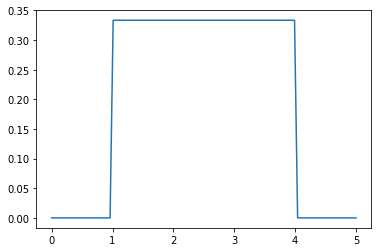

In [4]:
#равномерное распределение

uniform_rv = stats.uniform(1, 3)

uniform_rv.rvs(10)

x = np.linspace(0, 5, 100)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [20]:
#наиболее неустойчива к выбросам - матожидание, на медиане эффект незначительный
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
#med = sorted(sample)[24]
med = np.median(sample)
mean = sample.mean()
print(med)
print(mean)
#your code here
overshoot = np.array([1000, 2000, 3000])
sample_with_overshoot = np.append(sample, overshoot)
new_med =np.median(sample_with_overshoot)
new_mean = sample_with_overshoot.mean()
print(new_med)
print(new_mean)
print(sample_with_overshoot)

3.8489811579551425
3.989774099344785
4.0428878867849525
114.87923109382562
[2.90613267e+00 2.85435151e+00 2.85233115e+00 4.48142017e+00
 2.36528939e+00 4.10272293e+00 3.38555142e+00 4.87883178e+00
 4.07659825e+00 2.79277444e+00 6.74769098e+00 1.66676830e+00
 3.84898116e+00 7.00891207e+00 4.15446056e+00 4.80937865e+00
 2.35831668e+00 6.15485293e+00 5.02786595e+00 2.67796142e+00
 4.68904603e+00 2.41018482e+00 4.63043327e+00 3.11093244e+00
 4.20336572e+00 4.77340204e+00 5.14888022e+00 4.00917753e+00
 2.35610781e+00 3.01939228e+00 3.39333224e+00 2.81811969e+00
 2.94178499e+00 5.20391047e+00 3.46755969e+00 5.45745005e+00
 6.54085651e+00 4.34710331e+00 3.30004148e+00 4.35753833e+00
 1.67359234e+00 3.60465241e+00 4.18082543e+00 7.61943389e+00
 2.07299054e+00 1.77548719e+00 1.94442582e+00 2.19175636e+00
 1.18941829e+01 2.37215207e+00 4.81916879e+00 1.00000000e+03
 2.00000000e+03 3.00000000e+03]


- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [36]:
#в этом случае среднее изменится: увеличиться на константу С, измениться в С раз, соответственно для сложения и умноженияё
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 2
#your code here
mean =sample.mean()
mean_with_c = (sample+C).mean()
mean_mult_c = (sample*C).mean()
print(mean)
print(mean_with_c)
print(mean_mult_c)

1.86
3.86
3.72


- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [49]:
#при добавлении выбросов, рост дисперсии также будет экспоненциальным
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()
print(var)

#your code here
overshoot = np.array([1000, 10000])
sample_with_overshoot = np.append(sample, overshoot)
new_var =sample_with_overshoot.var()
print(new_var)

1.6361430634596212
1895441.927257694


- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s, \bar{X}+s)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [97]:
#доверительный интервал всегда будет шире чем интерквантильный размах
from math import sqrt
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)
#your code here
mean= sample.mean()
interq = (np.quantile(sample, 0.75) - np.quantile(sample, 0.25))
std = sqrt(sum([(i-mean)**2 for i in sample]) / (len(sample) - 1))
interv2 = (mean + std) - (mean - std)
print(interq)
print(interv2)
print(sample.mean())

1.2986513481455213
2.0008769090986984
2.9571642760979016


## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [16]:
#статистики - показатели, характеризующие распределение: среднее, дисперсия, медиана, мода, интерквантильный размах и т.п.
beta_rv = stats.beta(1,3)
sample = beta_rv.rvs(50)
#your code here
interq = (np.quantile(sample, 0.75) - np.quantile(sample, 0.25))
print(interq)
#sample

0.3908690437705074


- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [18]:
gamma_rv = stats.gamma(2,2)
sample = gamma_rv.rvs(50)
#your code here
mean = sample.mean()
var = np.var(sample)
med = np.median(sample)
print (mean)
print (var)
print (med)

3.848360909459457
1.6929677289893783
3.497251383151369


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

Text(0.5,1,'Обоснование ЦПТ')

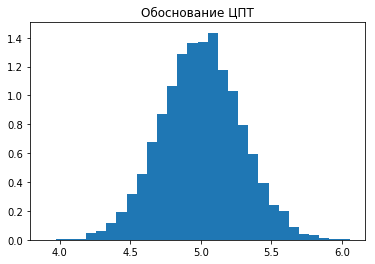

In [11]:
#будет нормальное распределение
import matplotlib.pyplot as plt
#your code here
norm_rv = stats.norm(5,2)
means = np.array([])
for i in range(10000):
    sample = norm_rv.rvs(50)
    #your code here
    means = np.append(means, sample.mean())
plt.hist(means, bins = 30,density = True)
plt.title('Обоснование ЦПТ')

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

Text(0.5,1,'ЦПТ не выполняется при случайной генерации распределения')

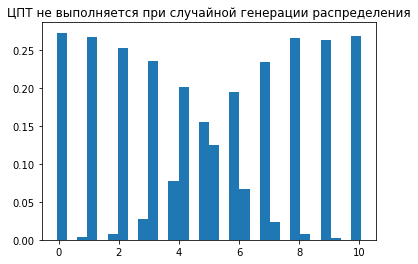

In [32]:
#при случайной генерации распределения в каждой итерации цикла распределение не получается нормальным, но это и понятно
from random import randint

means = np.array([])
for i in range(10000):
    n = randint(0, 10)
    norm_rv = stats.norm(n,0.1)
    sample = norm_rv.rvs(20)
    #your code here
    means = np.append(means, sample.mean())
plt.hist(means, bins = 30,density = True)
plt.title('ЦПТ не выполняется при случайной генерации распределения')

Text(0.5,1,'ЦПТ не выполняется при крайне малой выборке')

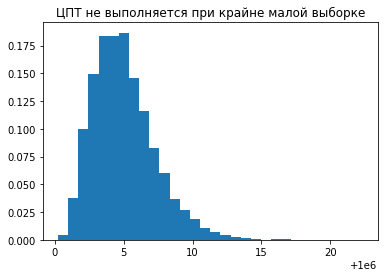

In [53]:
#занятно, что даже при огромном разбросе достичь "смещение" распределения средних в сторону от нормального не так просто
#например так, логично, что в этом случае по сути получается по сути само распределение
gamma_rv = stats.gamma(5,1000000)
means = np.array([])
for i in range(10000):
    sample = gamma_rv.rvs(1)
    means = np.append(means, sample.mean())
plt.hist(means, bins = 30,density = True)
plt.title('ЦПТ не выполняется при крайне малой выборке')
#print(means)

Text(0.5,1,'При увеличившейся выборке ЦПТ выполняется')

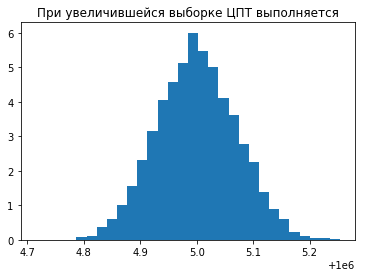

In [54]:
#а если размер выборки увеличить, то уже выполняется
gamma_rv = stats.gamma(5,1000000)
means = np.array([])
for i in range(10000):
    sample = gamma_rv.rvs(1000)
    means = np.append(means, sample.mean())
plt.hist(means, bins = 30,density = True)
plt.title('При увеличившейся выборке ЦПТ выполняется')

- Сделайте z-преобразование для данного распределения и посчитайте новое матожидание и дисперсию 

In [86]:
expon_rv = stats.expon(3)
sample = expon_rv.rvs(100)
new_rv = np.array([(sample[i] - sample.mean())/sample.std() for i in range(len(sample))])#your code here
print(new_rv.mean())
print(new_rv.var())
#насколько я понимаю, абсолютного нуля здесь не достичь, т.к. происходят операции с типом float, но 15 нулей после запятой
#показываются нам искомое: среднее значение = 0 и дисперсия = 1 

1.1102230246251565e-16
1.0


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [97]:
#your code here
chi_rv = stats.chi2 (10)
DI_90 = chi_rv.ppf(q=0.90)
DI_90

15.987179172105263

- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [100]:
#95% интервал шире, чем 90%
student_rv = stats.t(15)
DI_90 = student_rv.ppf(q=0.90)
DI_95 = student_rv.ppf(q=0.95)
print(DI_90)
print(DI_95)

1.3406056078504547
1.7530503556925547


- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [218]:
#наверное не понял, в чём подвох в задании :)
#доверительные интервалы для этих выборок примерно равны, при рандоме один ДИ может быть как больше так и меньше другого
#даже если сделать одну выборку в 10 раз больше другой
norm_rv = stats.norm(0, 2)
print(norm_rv.ppf(0.90))
#your code here

N1 = 10000
N2 = 200000
a = np.random.normal(0, 2, N1)
b = np.random.normal(0, 2, N2)
mean1, sigma1 = a.mean(), a.std()
mean2, sigma2 = b.mean(), b.std()
conf_int_a = stats.norm.interval(0.90, loc=mean1, scale=sigma1)
conf_int_b = stats.norm.interval(0.90, loc=mean2, scale=sigma2)
print(conf_int_a[1] - conf_int_a[0])
print(conf_int_b[1] - conf_int_b[0])

2.5631031310892007
6.515888623950078
6.581402482187936


- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

In [ ]:
#your answer here
#это ошибка второго рода - ложно отрицательная, т.е. была принята неверная гипотеза

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем хуже гипотеза.


In [ ]:
#your answer here
1 - неверно
2 - неверно (не отвергаем гипотезу)
3 - неверно (тем меньше p, тем больше оснований отвергать гипотезу)

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99% доверительный интервал хорошей оценкой в общем случае?

In [ ]:
#your answer here
если отклонять рисковано - будем использовать p value = 0.01

является ли 99% ДИ - зависит от задачи, является хорошим, если требуется высокая точность, если исходные данные достаточно
хороши и точны

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

In [ ]:
#your code here

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

In [ ]:
#your code here

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

In [ ]:
#your code here

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [ ]:
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))

#your code here